# Clustering: Customer Segmentation with K-Means 
***
 implement the K-Means clustering algorithm, find the value for K using the Elbow method, the Silhouette method, and the Gap statistic, and visualize the clusters with Principal Components Analysis (PCA). This uses real data containing information on marketing newsletters and email campaigns, as well as transaction-level data from customers.
The case study is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by the `yhat` blog.

Structure of the case study is:

1. **Sourcing and loading**

2. **Cleaning, transforming and visualizing**  

3. **Modelling** 
    * K-Means clustering: Exercise Sets 2 and 3   
    * Visualizing clusters with PCA: Exercise Sets 4 and 5

4. **Conclusions and next steps**


In [49]:
#Import Libraries
%matplotlib inline
import pandas as pda
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## 1. Sourcing and loading
### 1a. Load the data
The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [50]:
#Loading data 
df_offers = pda.read_excel("./WineKMC.xlsx", sheet_name=0)

/Users/saadhameed/anaconda3/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


### 1b. Explore the data

In [51]:
#Exploring offers data in worksheet 1 including the month of offer and details about the wine offerred 
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


A. First dataset contains details about each offer including: 
1. the month of the offer 
2. Several other attributes about the offer wine including: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. 

B. Second dataset in the second worksheet contains transactional data about which offer did each customer respond to. 

In [24]:
#Exploring transactional data in worksheet 2 about which offer customer responsed to 
df_transactions = pda.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

/Users/saadhameed/anaconda3/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## 2. Cleaning, transforming and visualizing
### 2a. Data Wrangling

In [52]:
#Create a data frame where each row has the following columns customer_name, offer_id, offer response
new_df = pda.merge(df_transactions, df_offers)
pivot_table = pda.pivot_table(new_df, index='customer_name', columns='offer_id', values='n', fill_value=0)
pivot_table

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Williams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Wilson,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
Wood,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## 3. Modelling 
### 3a. K-Means Clustering


Text(0, 0.5, 'Squared Sum')

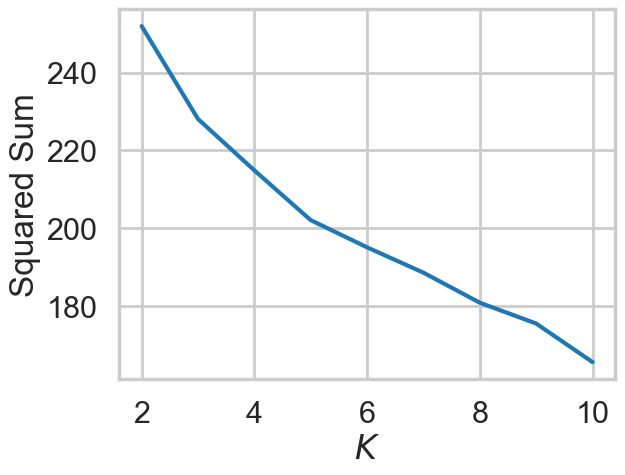

In [53]:
# Import Sklearn Cluster Library
import sklearn.cluster
import numpy as npy

# Make an empty list
ss =  []

# Create a dictionary called assignments 
assignments = {}

# Use to_numpy() to cast your table 'pivoted' as a matrix store it in a variable x_cols 
x_cols = pivot_table.to_numpy()

# Make a variable called K_Range, and assign it a list of range(2, 11)
K_Range = list(range(2, 11))

# Iterating through this list to construct a plot showing SS for each iterator variable K
for k in K_Range:
    # Make a variable called model, and assign it the result of calling sklearn.cluster.KMeans, with n_clusters = K 
    model = sklearn.cluster.KMeans(n_clusters=k)
    assigned_cluster = model.fit_predict(x_cols)
    centers = model.cluster_centers_
    ss.append(npy.sum((x_cols - centers[assigned_cluster]) ** 2))
    assignments[str(k)] = assigned_cluster
    
# Call plot() on plt with parameters K_Range and ss
plt.plot(K_Range, ss)

# Let's label the plot 
plt.xlabel("$K$")
plt.ylabel("Squared Sum")

5


([<matplotlib.axis.XTick at 0x168d74f40>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

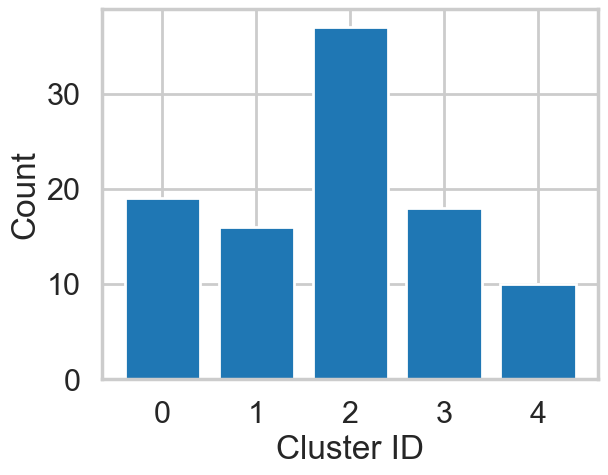

In [32]:
optimal_K = 5
assignments_optimal_K = assignments[str(optimal_K)]
counts = npy.bincount(assignments_optimal_K)
print(len(counts))

plt.bar(range(optimal_K),counts,align = 'center')

plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.xticks(range(optimal_K))

/var/folders/dl/19x8l1v134n19c5rqf79_v2w0000gn/T/ipykernel_82660/2456703014.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Spectral")
/var/folders/dl/19x8l1v134n19c5rqf79_v2w0000gn/T/ipykernel_82660/2456703014.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Spectral")
/var/folders/dl/19x8l1v134n19c5rqf79_v2w0000gn/T/ipykernel_82660/2456703014.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Spectral")
/

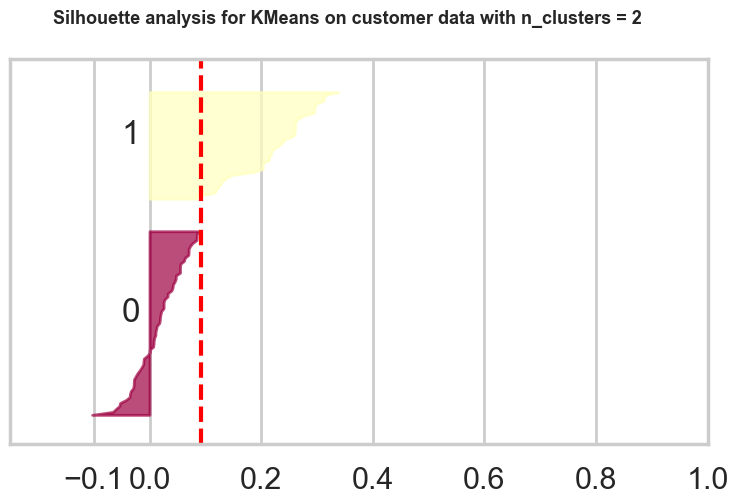

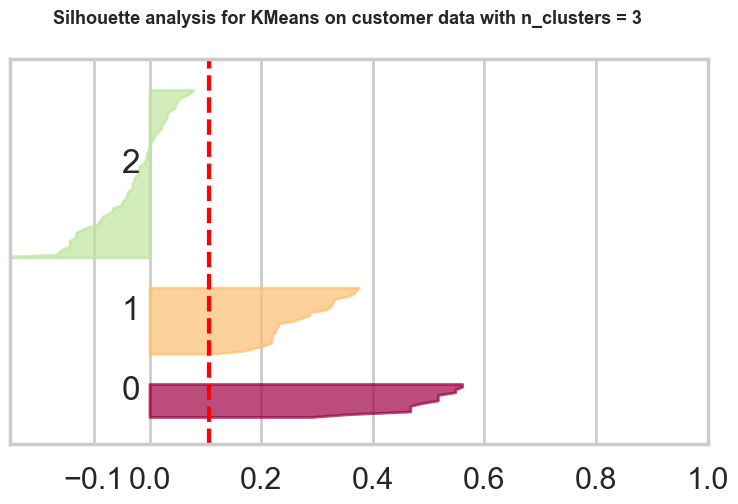

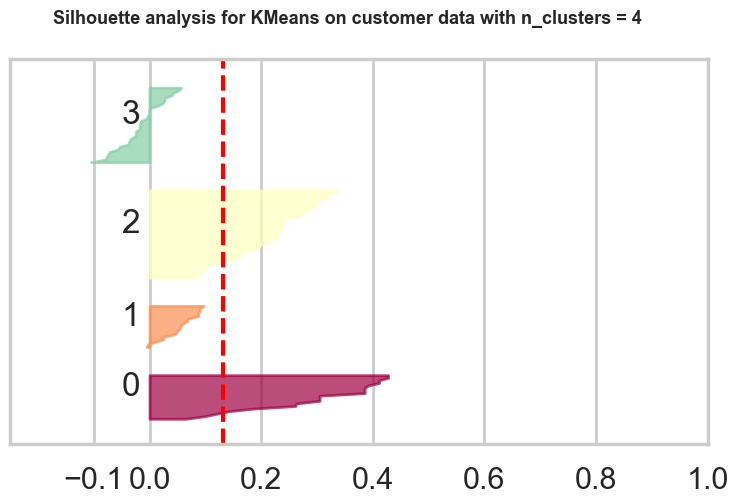

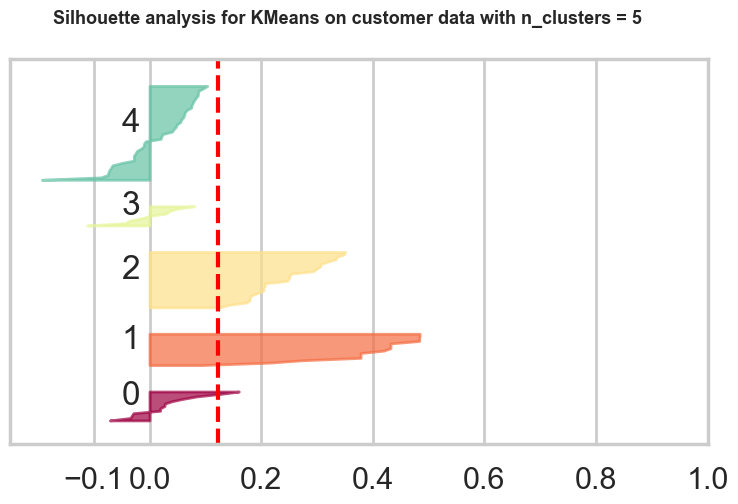

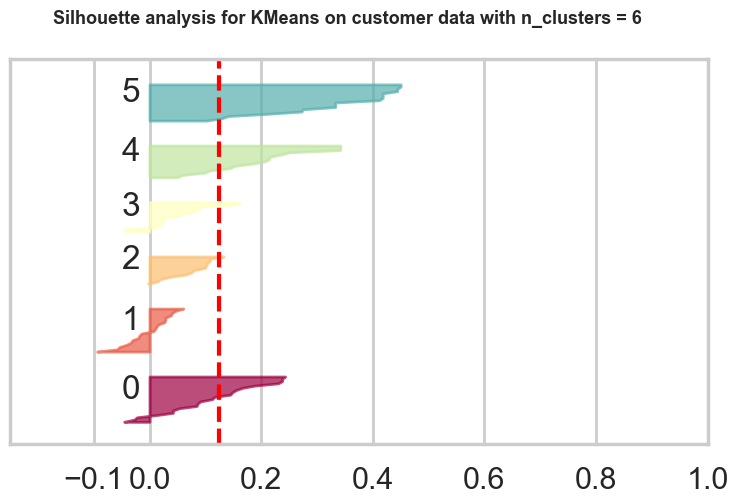

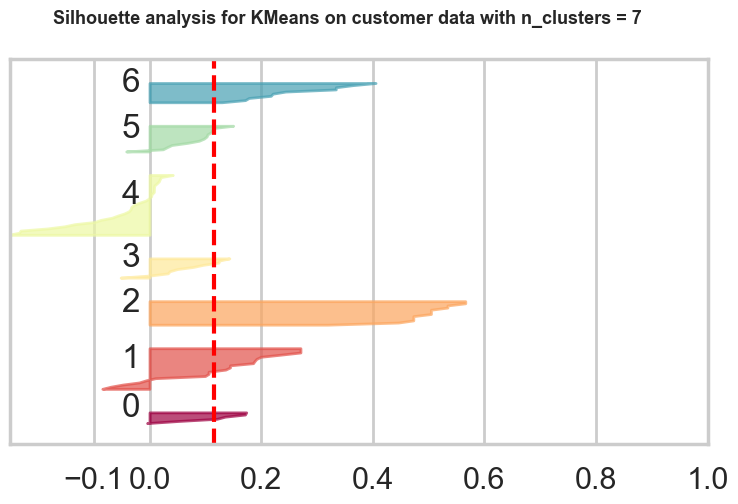

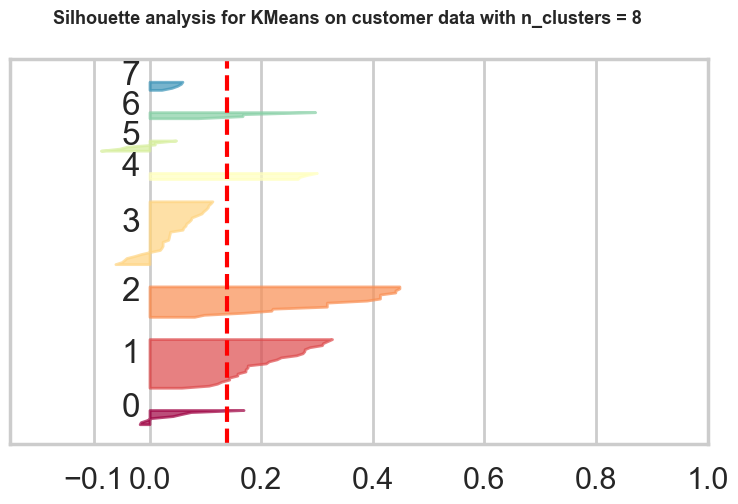

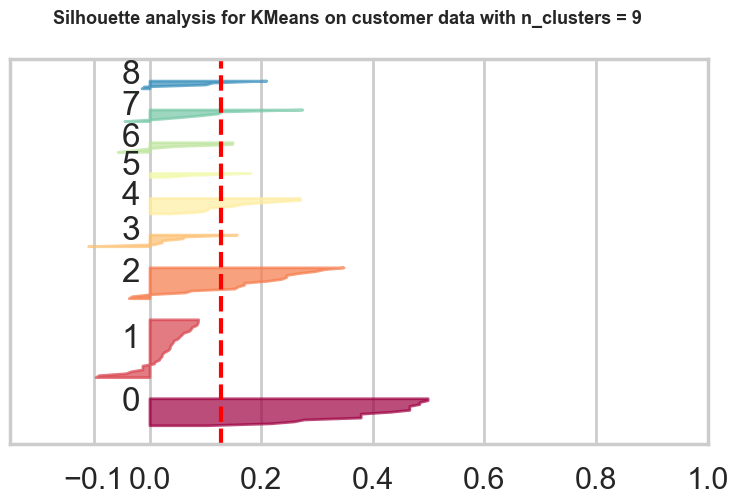

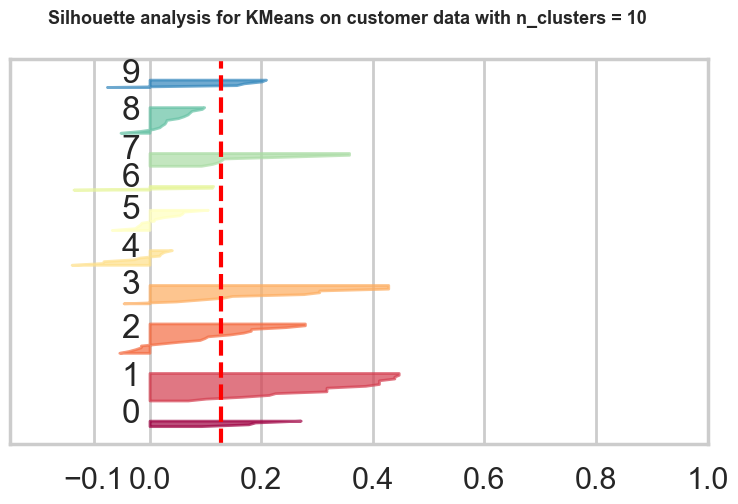

In [45]:
# Create a series of silhouette plots and compute the average silhouette score for each 𝐾
import sklearn.metrics
import matplotlib.cm as cm

# Make an empty list called avg_silhouette_scores
avg_silhouette_scores = []

# Iterate through K_Range with variable K as before
for k in K_Range:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 5)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.25, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette for clear delineation 
    
    ax1.set_ylim([0, len(x_cols) + (k + 1) * 10])

    # Initialize with n_clusters value with a random generator seed of 13 for reproducibility.
    clusterer = sklearn.cluster.KMeans(n_clusters=k, random_state=13)
    cluster_labels = clusterer.fit_predict(x_cols)

    # Use silhouette_score to get the average value for all the samples. 
    #This provides a view into the density and separation of the formed clusters

    average_sil = sklearn.metrics.silhouette_score(x_cols, cluster_labels)
    avg_silhouette_scores.append(average_sil)

    # Compute the silhouette scores for each sample
    sample_sil_vals = sklearn.metrics.silhouette_samples(x_cols, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate and sort the silhouette scores for samples for cluster i

        ith_cluster_silhouette_values = sample_sil_vals[cluster_labels == i]

        # Sort the variable 
        ith_cluster_silhouette_values.sort()
    
        # Check shape of the variable 
        size_cluster_i = ith_cluster_silhouette_values.shape[0] 
        y_upper = y_lower + size_cluster_i

        #Set cmap values 
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / k)
        ax1.fill_betweenx(npy.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Labeling the silhouette plots with their cluster numbers 

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  
        


    ax1.axvline(x=average_sil, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans on customer data "
                  "with n_clusters = %d" % k),
                 fontsize=13, fontweight='bold')


Text(0, 0.5, 'AVG Silhouette Score')

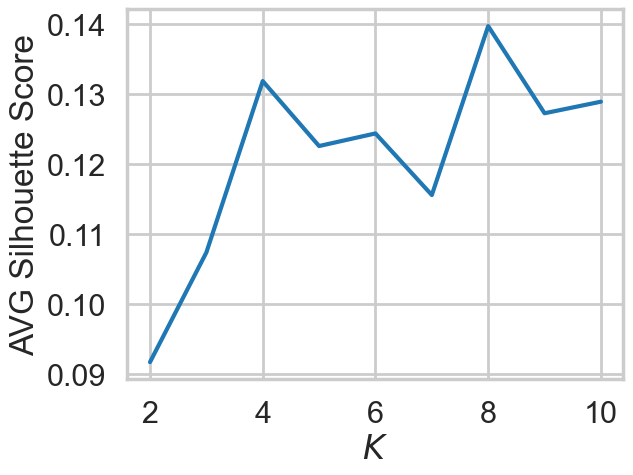

In [54]:
# Plot average sillhouette score against the K label  
plt.plot(K_Range, avg_silhouette_scores)
plt.xlabel("$K$")
plt.ylabel("AVG Silhouette Score")

### 3b. Visualizing Clusters using PCA

Using Principal Component Analysis to reduce the 32 dimensions into a more manageable number to reduce noise in the analysis 

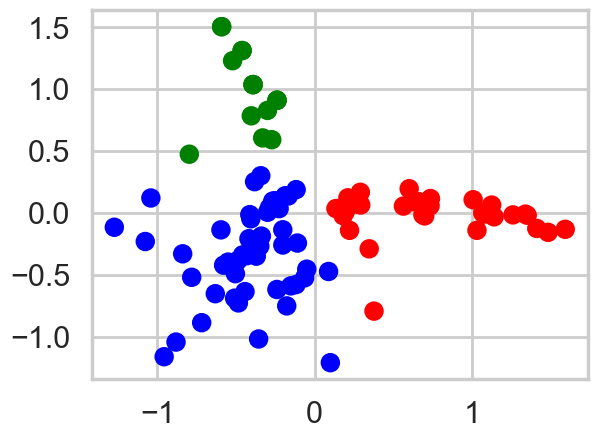

In [55]:
# Use scikit-learn's PCA function to reduce the dimensionality of  clustering data to 2 components
import sklearn.decomposition
import matplotlib.colors

 
model = sklearn.cluster.KMeans(n_clusters=3)
cluster_assignments = model.fit_predict(x_cols)

cmap = matplotlib.colors.ListedColormap(['red', 'green', 'blue'])

pca = sklearn.decomposition.PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(x_cols))
plt.scatter(pc1, pc2, c=cluster_assignments.tolist(), cmap=cmap)

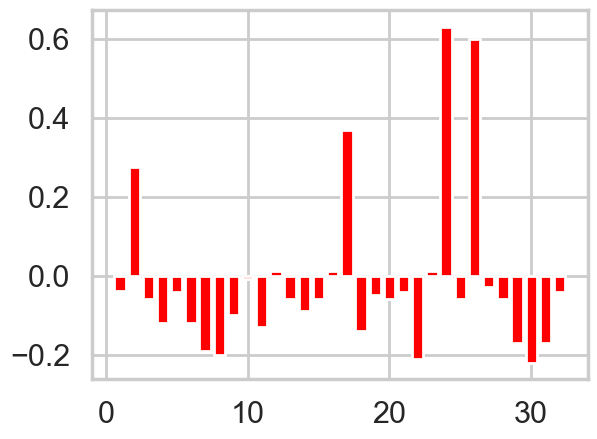

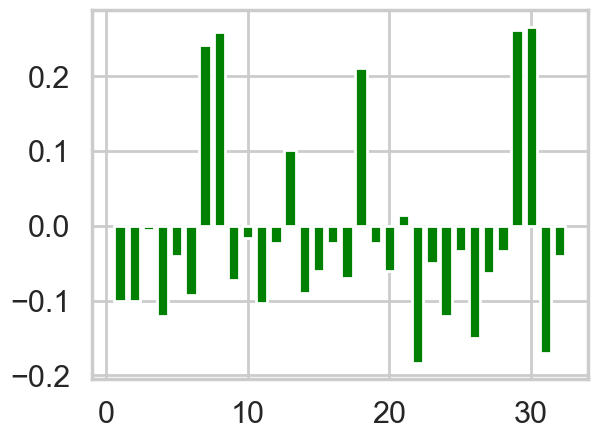

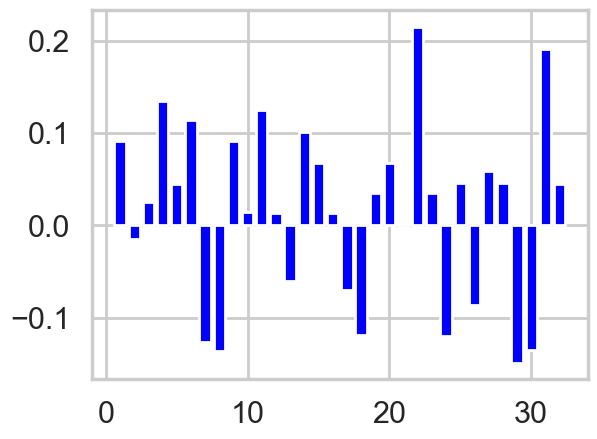

In [15]:
model = sklearn.cluster.KMeans(n_clusters=3)
cluster_assignments = model.fit_predict(x_cols)

colors = ['red', 'green', 'blue']
offer_proportions = pivot_table.sum(axis=0) / 100
for i in range(3):
    plt.figure(i)
    cluster = pivot_table[cluster_assignments == i]
    offer_proportions_cluster = cluster.sum(axis=0) / cluster.shape[0]
    lift = offer_proportions_cluster - offer_proportions
    plt.bar(range(1, 33), lift, color=colors[i])

Text(0, 0.5, 'Proportion Variance Explanation')

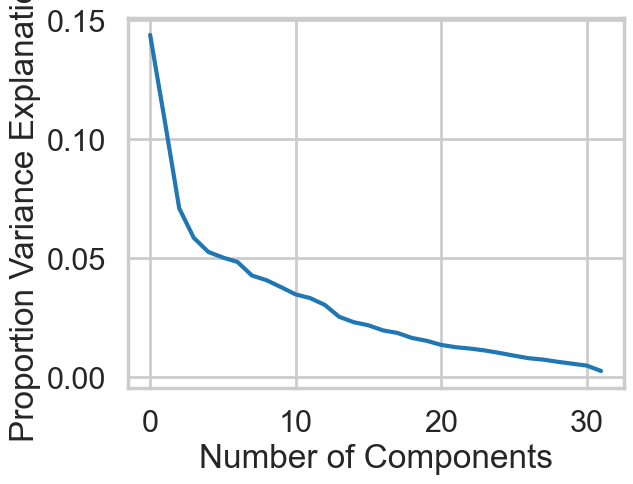

In [56]:
#Using a new PCA object shown in the next cell, plotting the `explained_variance_ratio` field 
#to look for the elbow point, the point where the curve's rate of descent seems to slow sharply.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(x_cols)


var = pca.explained_variance_ratio_
plt.plot(range(len(var)), var)
plt.xlabel("Number of Components")
plt.ylabel("Proportion Variance Explanation")


It seems the elbow point is around 7-10 componenents

## 4. Clustering Using Other Algorithsm


In [57]:
#Imoport Libraries 
from sklearn.cluster import AgglomerativeClustering, DBSCAN, AffinityPropagation, SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score

In [58]:
# Affinity Propagation Clustering

X = pivot_table
affprop = AffinityPropagation()
labels = affprop.fit_predict(X)
s_score = silhouette_score(X, labels)
print('Affinity Propogation:', s_score)

Affinity Propogation: 0.12312023722040351


In [61]:
# DBSCAN Clustering 
db = DBSCAN(eps=2)
labels = db.fit_predict(X)
s_score = silhouette_score(X, labels)
print('DBSCAN Silhouette score:', s_score)


DBSCAN Silhouette score: 0.2348896595208253


Text(0, 0.5, 'Silhouette Score')

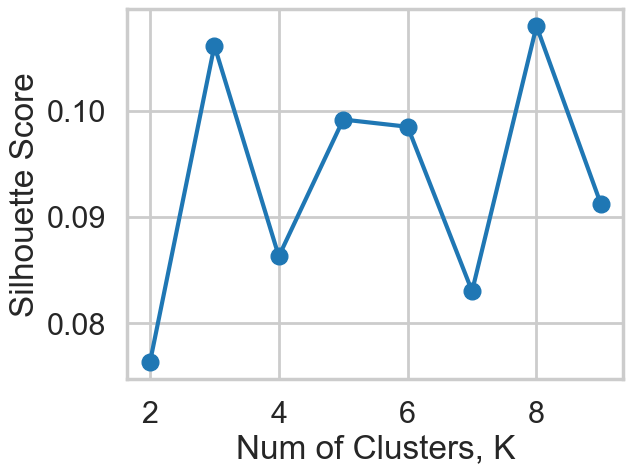

In [59]:
# Spectral Clustering

Kclusters = range(2,10)
s_score = []

for k in Kclusters:
    sc = SpectralClustering(n_clusters=k, random_state=10)
    labels = sc.fit_predict(X)
    s_score.append(silhouette_score(X, labels))


plt.plot(Kclusters, s_score, '-o')
plt.xlabel('Num of Clusters, K')
plt.ylabel('Silhouette Score')

Text(0, 0.5, 'Silhouette score')

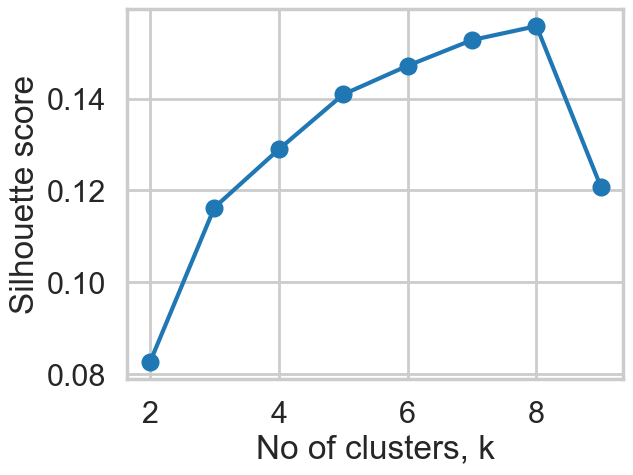

In [60]:
# Agglomerative Clustering

Kclusters = range(2,10)
s_score = []

for k in Kclusters:
    ac = AgglomerativeClustering(n_clusters=k)
    labels = ac.fit_predict(X)
    s_score.append(silhouette_score(X, labels))

plt.plot(Kclusters, s_score, '-o')
plt.xlabel('No of clusters, k')
plt.ylabel('Silhouette score')